Plot Analytes by Site, Looking for an Outlier in the Final Observation
--

This is only intended to produce a plot, nothing more.

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline

In [10]:
siteID = 'RU003'
days = '3650'
minobs = 5 #minimum number of observations to calculate what is typical
types = ['Al-w', 'As-w', 'B-w', 'Br-w', 'Ca-w', 'Cs-w', 'Cl-w', 'F-w', 'Fe-w', 'HCO3-w', 'H2S-w', 'K-w', 'Li-w', 'Mg-w', 'Na-w', 'NH3-w', 'NO3-N-w', 'PO4-P-w', 'Rb-w', 'SO4-w', 'SiO2-w']

In [11]:
#data range for plot labelling
drange = float(int(days)/365)

**Get data for 'background' and last values**

In [12]:
#setup dataframes
names = ['date', 'obs']
dfall = pd.DataFrame() #for background
dflast = pd.DataFrame() #for last values

#loop through typeIDs
for typeID in types:
    url = 'https://fits.geonet.org.nz/observation?siteID='+siteID+'&typeID='+typeID+'&days='+days
    df = pd.read_csv(url, skiprows=1, parse_dates=True, names=names, usecols=[0,1], index_col=0)
    df['typeID'] = typeID
        
    if not df.empty: #may not analyse for this typeID
        #check last value is non-zero
        if df['obs'].iloc[-1] !=0:
            #keep only non-zero values
            df = df[df['obs'] != 0]
            #ensure we have sufficient values to do anything
            if len(df) >= minobs+1:
                #get last value from df, append to dataframe of last values
                dfl = df.iloc[-1:]
                dflast = dflast.append(dfl)
                #drop last value from from df, then append to dataframe of remaining data
                df.drop(df.index[-1:], inplace=True)
                dfall = dfall.append(df)

In [13]:
dfall['typeID'].unique()

array(['Al-w', 'As-w', 'B-w', 'Br-w', 'Ca-w', 'Cl-w', 'F-w', 'Fe-w',
       'H2S-w', 'K-w', 'Li-w', 'Mg-w', 'Na-w', 'NH3-w', 'SO4-w', 'SiO2-w'], dtype=object)

In [14]:
dflast['typeID'].unique()

array(['Al-w', 'As-w', 'B-w', 'Br-w', 'Ca-w', 'Cl-w', 'F-w', 'Fe-w',
       'H2S-w', 'K-w', 'Li-w', 'Mg-w', 'Na-w', 'NH3-w', 'SO4-w', 'SiO2-w'], dtype=object)

In [15]:
#sort last values so order matches that of boxplot
dflast.sort_values('typeID', ascending=True, inplace=True)
#index from 1 to n
dflast.index = range(1,len(dflast)+1)

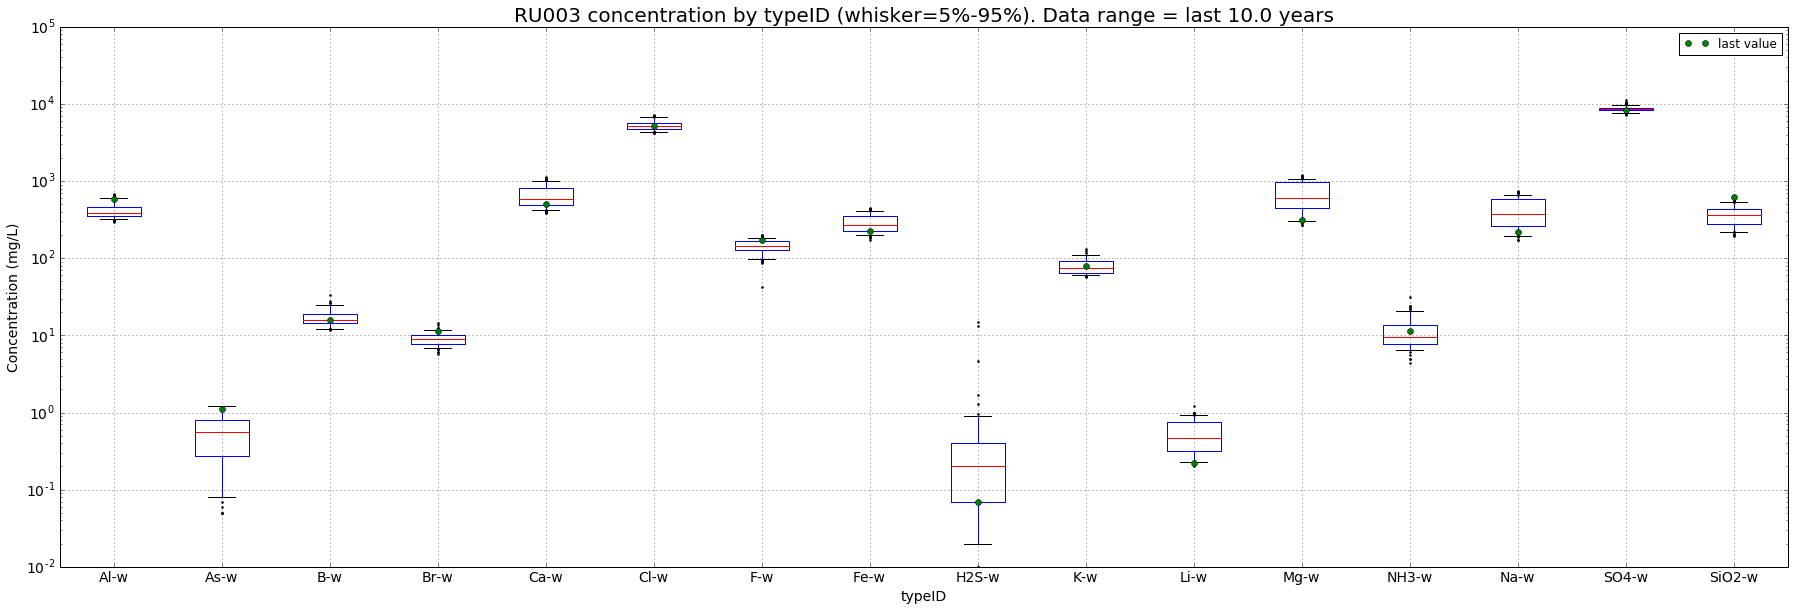

In [16]:
flierprops = dict(marker='o', markerfacecolor='black', markersize=2)
whiskerprops = dict(linestyle='-')
bp = dfall.boxplot(column='obs', by='typeID', figsize=(30,10), whis=[5,95], fontsize=14, flierprops=flierprops, whiskerprops=whiskerprops)
bp.plot(dflast['obs'], marker='o', color='green', linestyle='none', label='last value')
bp.get_figure().suptitle("") #get rid of automatic boxplot sub-title
bp.set_ylabel("Concentration (mg/L)", fontsize=14)
bp.set_xlabel("typeID", fontsize=14)
bp.set_yscale('log')
bp.set_title(siteID+' concentration by typeID (whisker=5%-95%). Data range = last '+str(drange)+' years', fontsize=20)
bp.legend(loc='best')
fig = bp.get_figure()
#fig.savefig(siteID+'_'+str(drange)+'_years.png', dpi=200)